# Introduction
Basic visualization and EDA of the dataset

In [35]:
import os
import sys

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

from src.utils import import_dataset

In [15]:
dat = import_dataset()  # Pre-specified import function from src.utils
dat.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino


# Assessing target variable - bucket into bad/good mpg for feature analysis

count    398.000000
mean      23.514573
std        7.815984
min        9.000000
25%       17.500000
50%       23.000000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64


<AxesSubplot:>

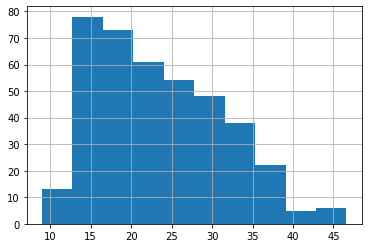

In [17]:
print(dat['mpg'].describe())
dat['mpg'].hist()

In [25]:
dat['mpg_bin'] = pd.cut(dat['mpg'], [0, 20, 35, 60], labels=['bad', 'moderate', 'good'])

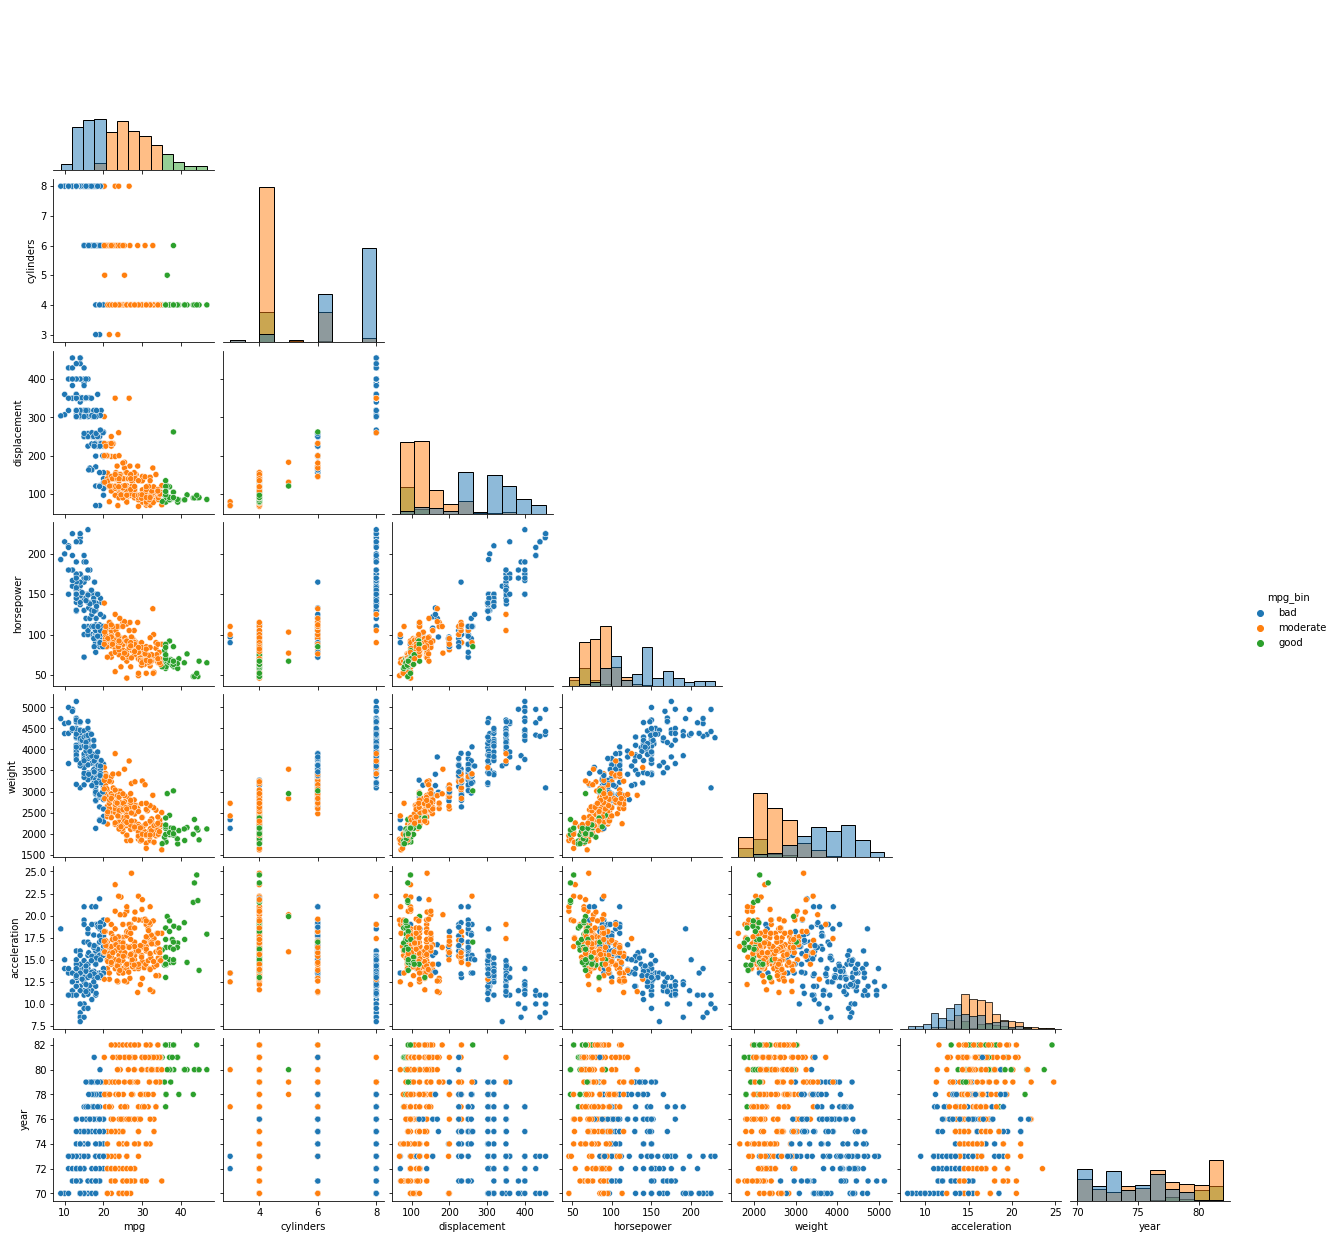

In [37]:
usecols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'mpg_bin']
sns.pairplot(dat[usecols], hue='mpg_bin', diag_kind='hist', corner=True)

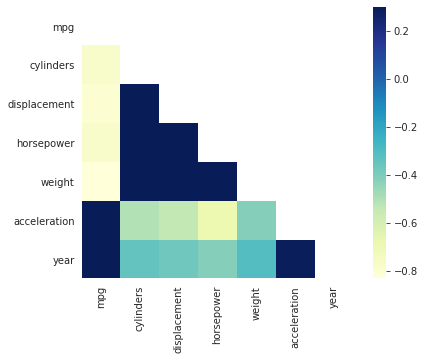

In [44]:
corr = dat[usecols].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(7, 5))

    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, cmap='YlGnBu')

Overall, each individual feature show some type of distinction between bad, moderate and good mpg, and the pairplot from `mpg` shows clusters. We could infer from the pairplot that there exists a linear relationship between the target variable and independent variables. A few things to note from the visualization:
* MPG seems to improve over the years, and we see in year 82 there are no "bad" mpg cars
* Acceleration (time to 60mpg) is positively correlated with mpg. The column name "acceleration" seems to be misleading
* All other numerical variables show negative correlation with the target variable

# Origin 

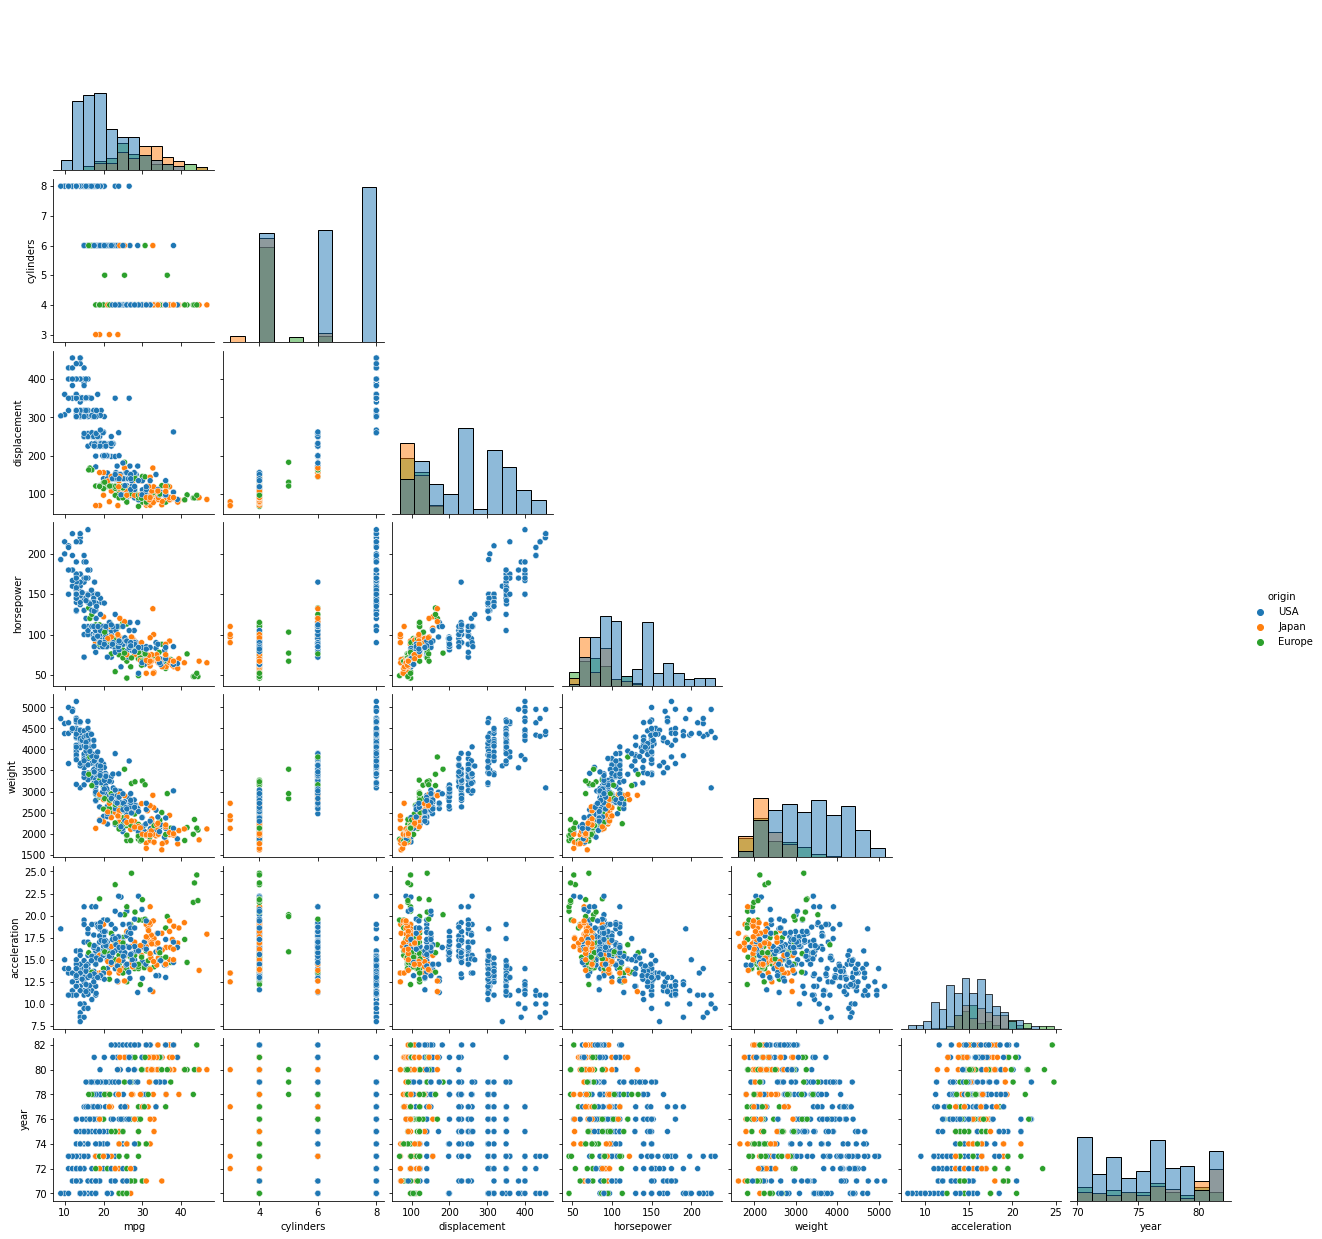

In [45]:
usecols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']
sns.pairplot(dat[usecols], hue='origin', diag_kind='hist', corner=True)

# Car Model (text)

In [50]:
# How many words are there in name?
dat['name'].apply(lambda x: len(x.split(' '))).value_counts()

2    199
3    152
4     42
5      2
1      2
6      1
Name: name, dtype: int64

In [59]:
# Inspect names based on number of words
tmp = dat.copy()
tmp['name_len'] = tmp['name'].apply(lambda x: len(x.split(' ')))
tmp[tmp['name_len']>=4].tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_bin,name_len
340,25.8,4,156.0,92.0,2620.0,14.4,81,USA,dodge aries wagon (sw),moderate,4
359,28.1,4,141.0,80.0,3230.0,20.4,81,Europe,peugeot 505s turbo diesel,moderate,4
370,31.0,4,112.0,85.0,2575.0,16.2,82,USA,pontiac j2000 se hatchback,moderate,4
376,37.0,4,91.0,68.0,2025.0,18.2,82,Japan,mazda glc custom l,good,4
387,38.0,6,262.0,85.0,3015.0,17.0,82,USA,oldsmobile cutlass ciera (diesel),good,4


In [58]:
tmp[tmp['name_len']==2].tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_bin,name_len
392,27.0,4,151.0,90.0,2950.0,17.3,82,USA,chevrolet camaro,moderate,2
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe,vw pickup,good,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA,dodge rampage,moderate,2
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA,ford ranger,moderate,2
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA,chevy s-10,moderate,2


In [57]:
# Get first name, assuming that's the car make. We see that there are spelling errors on model. 
set(dat['name'].apply(lambda x: x.split(' ')[0]))

{'amc',
 'audi',
 'bmw',
 'buick',
 'cadillac',
 'capri',
 'chevroelt',
 'chevrolet',
 'chevy',
 'chrysler',
 'datsun',
 'dodge',
 'fiat',
 'ford',
 'hi',
 'honda',
 'maxda',
 'mazda',
 'mercedes',
 'mercedes-benz',
 'mercury',
 'nissan',
 'oldsmobile',
 'opel',
 'peugeot',
 'plymouth',
 'pontiac',
 'renault',
 'saab',
 'subaru',
 'toyota',
 'toyouta',
 'triumph',
 'vokswagen',
 'volkswagen',
 'volvo',
 'vw'}

### Findings from the number of words
* All name starts with the model name. We could generate a feature from the model
* Names that have >=4 words have special labels or names in them. Names that have 1 word is just the car model.   

### Findings from set of model names
* Certain names contain duplicates, either due to spelling errors **(vokswagen vs. volkswagen)**, or abbreviations **(mercedes vs. mercedes-benz)**